In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
from numpy import pi
import ephem
#from geopy.geocoders import Nominatim
#geolocator = Nominatim()
from tqdm import tqdm
import reverse_geocoder as rg
from collections import Counter

In [2]:
#data = pd.read_csv('Dataset/satellites_in_orbit_info.csv')
#
#matrix = np.zeros([len(data),len(data)])
#
#for i in range(len(data)):
#    for j in range(i,len(data)):
#        if data['COUNTRY'][i] == data['COUNTRY'][j]:
#            matrix[i,j] = 1
#            matrix[j,i] = 1
# ATTENTION : ENV 1H20 DE COMPUTE
#
#trouduc = np.load('adjacencymatrix.npy')
#
#
#plt.spy(trouduc)

In [3]:
tle = open('Dataset/satellite_tle_current.txt')
lines = tle.readlines()

In [27]:
name = lines[0]
l1 = lines[1]
l2 = lines[2]
from datetime import datetime, timedelta
t = timedelta(seconds= 80)
d = datetime(2017,10,12)
temp = ephem.readtle(name, l1, l2)
temp.compute(d)
print(temp.sublong)
temp.compute(d+t)
print(temp.sublong)

-63:00:47.4
-58:22:54.3


In [4]:
numb_element = len(lines)
names = []
long = []
lat = []
elevation_km = []
for i in range(0,numb_element-1,3):
    temp = ephem.readtle(lines[i], lines[i+1], lines[i+2])
    temp.compute('2017/10/12')
    try:
        long.append(temp.sublong*180/pi)
        lat.append(temp.sublat*180/pi)
        elevation_km.append(temp.elevation/1000)
        names.append(temp.name[2:])
    except:
        print('Index number {} is not compatible to perform computation' .format(i))

Index number 5361 is not compatible to perform computation
Index number 49563 is not compatible to perform computation


In [5]:
data = pd.DataFrame(np.transpose([names,long,lat,elevation_km]))
data.columns = ['OBJECT_NAME','Longitude [°]','Latitude [°]','Elevation [km]']

In [6]:
coord = list(zip(lat,long))
result = rg.search(coord)
countries = [temp['cc'] for temp in result]
data['Country'] = countries

Loading formatted geocoded file...


In [7]:
data

,OBJECT_NAME,Longitude [°],Latitude [°],Elevation [km],Country
0,VANGUARD 1,-63.01315328238157,-26.65173623575367,950.1053125,AR
1,VANGUARD 2,33.607191075144456,-32.25819456312109,2825.77825,ZA
2,VANGUARD R/B,158.90670062542114,1.4622271746404283,746.4226875,FM
3,VANGUARD R/B,-117.00344908625789,12.395302654786787,2056.953375,MX
4,VANGUARD 3,-14.979412519707317,-30.811335100669776,3271.14,SH
5,EXPLORER 7,165.9903034740197,9.845133707399345,517.82565625,MH
6,TIROS 1,-49.25634633165384,48.00799948723977,649.5704375,CA
7,TRANSIT 2A,-139.31569634983023,38.87243705724013,970.6335,US
8,SOLRAD 1 (GREB),-0.5891223854904057,-47.06758489136657,745.2826875,SH
9,THOR ABLESTAR R/B,53.80098686574566,-2.196176677848373,829.1221875,SC


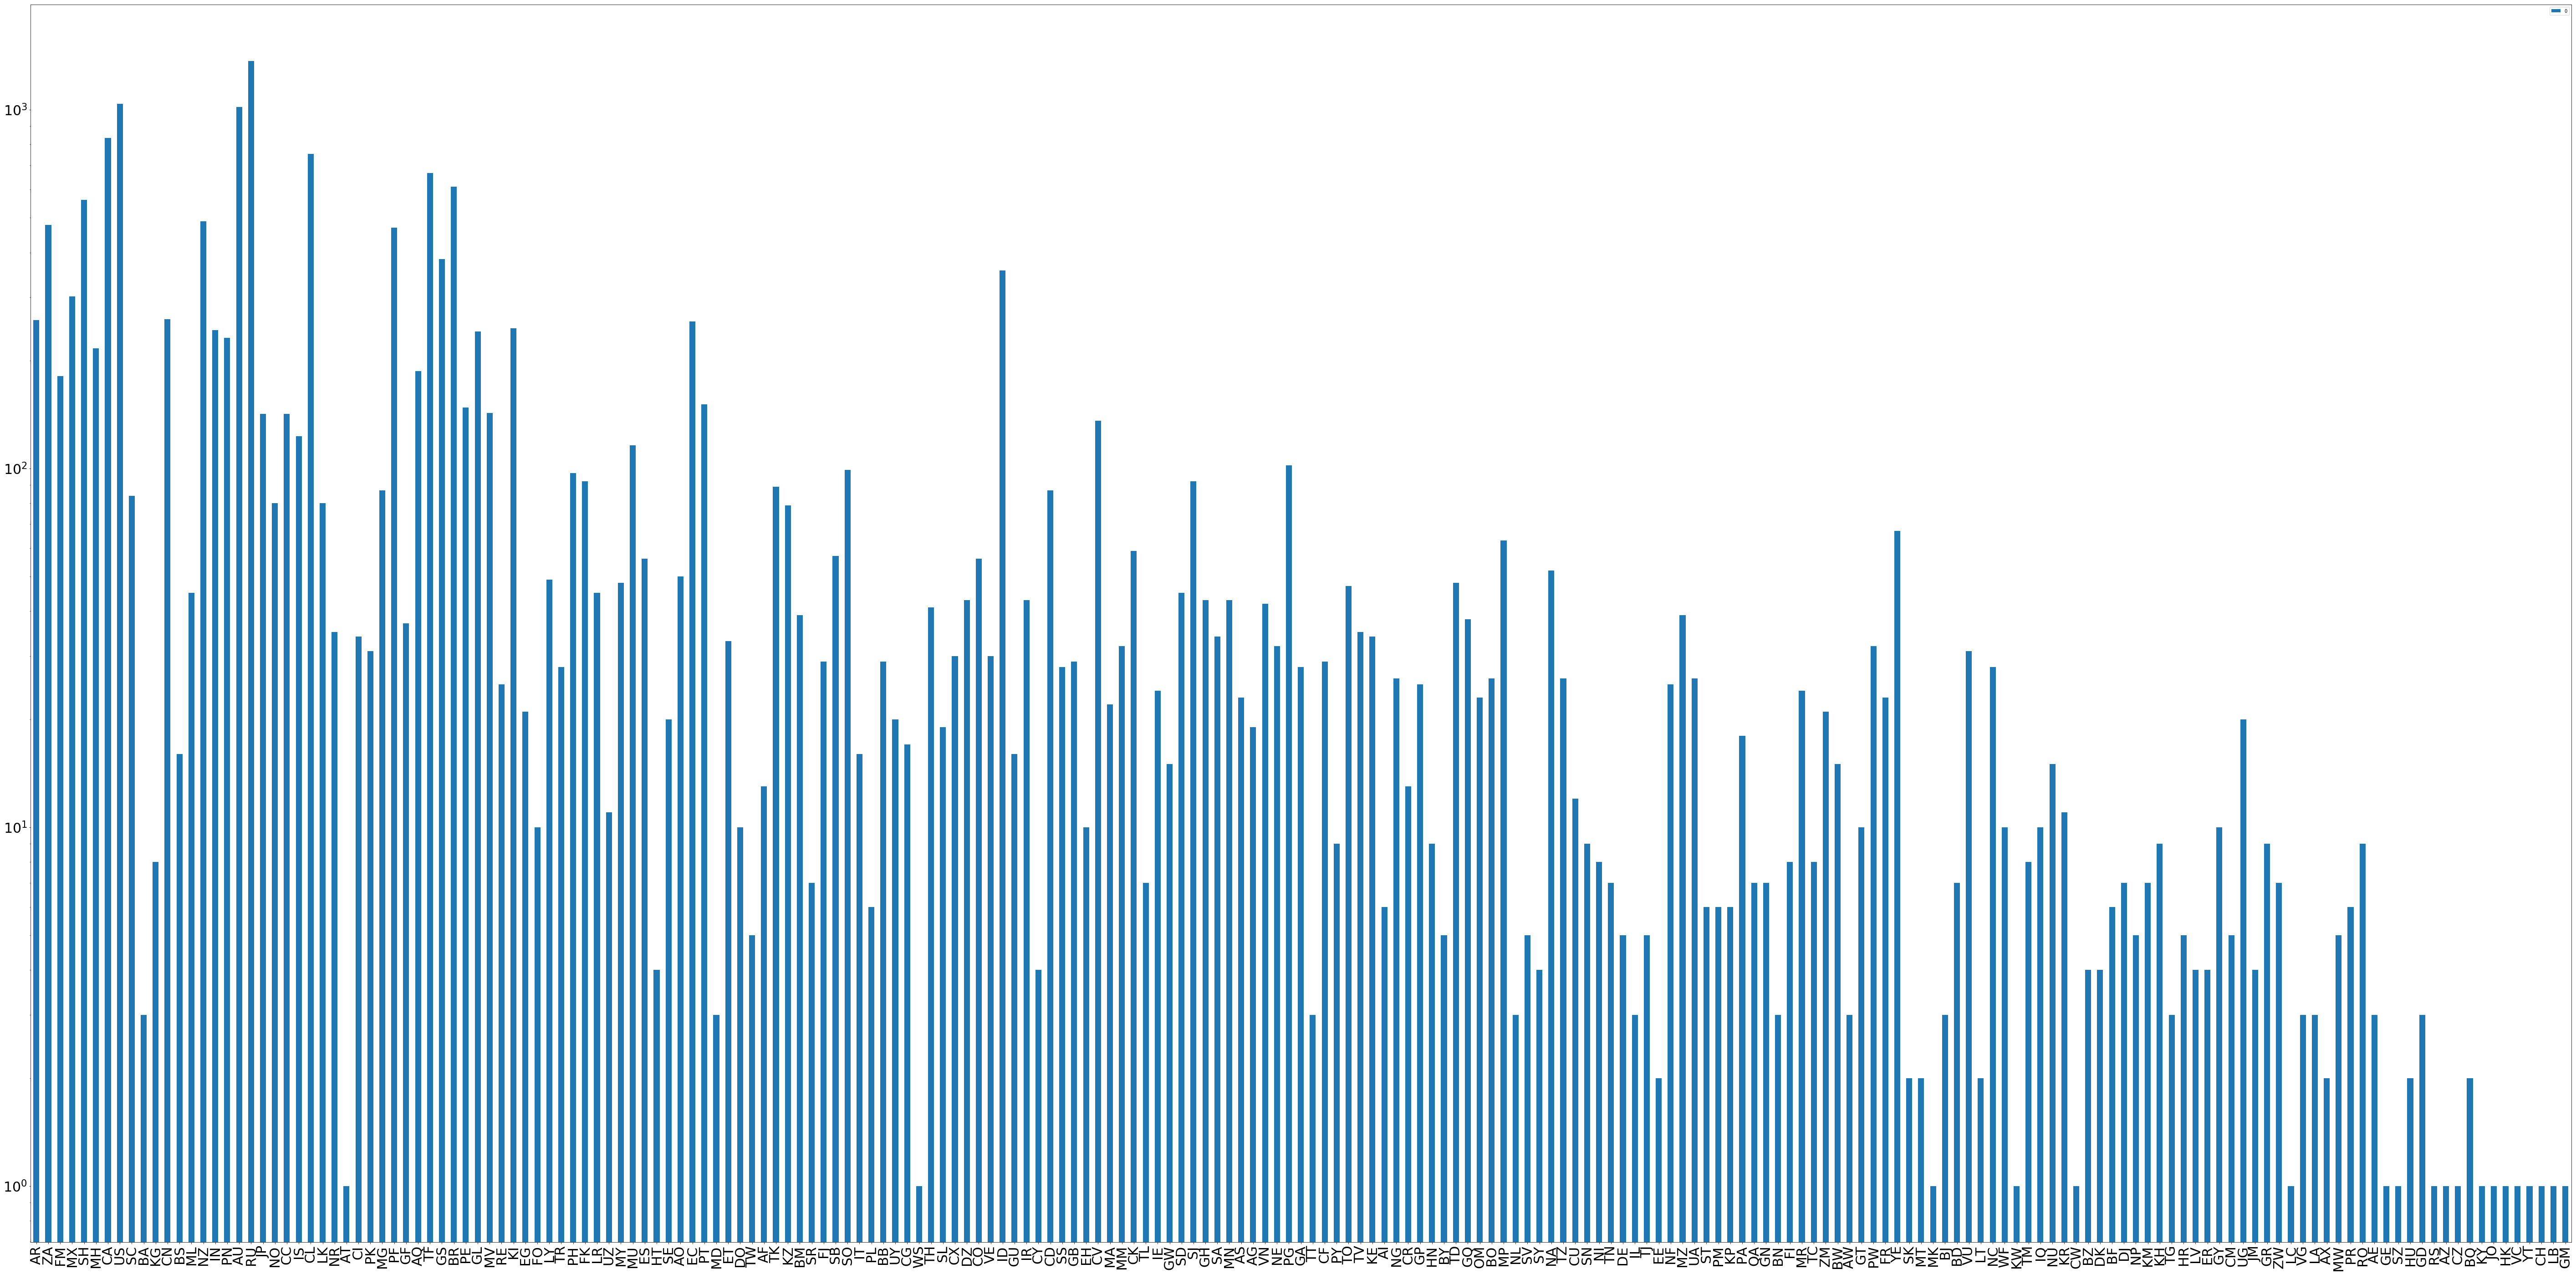

In [8]:
letter_counts = Counter(data['Country'])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',figsize=(100,50),logy=True,fontsize=30)

In [9]:
len(np.unique(data['Country']))

213

In [10]:
sioi = pd.read_csv('Dataset/satellites_in_orbit_info.csv')

In [11]:
no_deb = data[["DEB" not in x for x in data.OBJECT_NAME ]].drop_duplicates(subset = "OBJECT_NAME")

In [12]:
sioi = sioi[["DEB" not in x for x in sioi.OBJECT_NAME ]].drop_duplicates(subset = "OBJECT_NAME")

In [13]:
data_m = pd.merge(no_deb,sioi,how='inner', on="OBJECT_NAME")

In [14]:
mask = (data_m['Elevation [km]'].astype('float64') < 30000)
data_final = data_m[mask]

In [15]:
data_final

,OBJECT_NAME,Longitude [°],Latitude [°],Elevation [km],Country,OBJECT_ID,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,RCSVALUE,LAUNCH,COMMENT
0,VANGUARD 1,-63.01315328238157,-26.65173623575367,950.1053125,AR,1958-002B,5,US,132.75,34.24,3834.0,650.0,MEDIUM,0,1958-03-17,NaN
1,VANGUARD 2,33.607191075144456,-32.25819456312109,2825.77825,ZA,1959-001A,11,US,121.47,32.87,2940.0,553.0,MEDIUM,0,1959-02-17,NaN
2,VANGUARD R/B,158.90670062542114,1.4622271746404283,746.4226875,FM,1958-002A,16,US,137.32,34.28,4223.0,655.0,MEDIUM,0,1958-03-17,NaN
3,VANGUARD 3,-14.979412519707317,-30.811335100669776,3271.14,SH,1959-007A,20,US,124.62,33.35,3263.0,510.0,MEDIUM,0,1959-09-18,NaN
4,EXPLORER 7,165.9903034740197,9.845133707399345,517.82565625,MH,1959-009A,22,US,96.36,50.28,683.0,486.0,MEDIUM,0,1959-10-13,NaN
5,TIROS 1,-49.25634633165384,48.00799948723977,649.5704375,CA,1960-002B,29,US,97.68,48.38,665.0,631.0,MEDIUM,0,1960-04-01,NaN
6,TRANSIT 2A,-139.31569634983023,38.87243705724013,970.6335,US,1960-007A,45,US,100.45,66.69,968.0,592.0,MEDIUM,0,1960-06-22,NaN
7,SOLRAD 1 (GREB),-0.5891223854904057,-47.06758489136657,745.2826875,SH,1960-007B,46,US,99.37,66.69,873.0,584.0,MEDIUM,0,1960-06-22,NaN
8,THOR ABLESTAR R/B,53.80098686574566,-2.196176677848373,829.1221875,SC,1965-065B,1508,US,107.79,90.13,1157.0,1092.0,LARGE,0,1965-08-13,NaN
9,DELTA 1 R/B,16.734574768461957,44.07962984648528,1686.945125,BA,1989-089B,20323,US,99.43,97.12,782.0,681.0,LARGE,0,1989-11-18,NaN


In [16]:
dict_tle = {}
for i in range(0,len(lines)-1,3):
    dict_tle[lines[i][2:].strip('\n')] = (lines[i+1],lines[i+2])

In [17]:
keys = list(dict_tle.keys())
for i in keys:
    if i not in data_final['OBJECT_NAME'].values:
        del dict_tle[i]

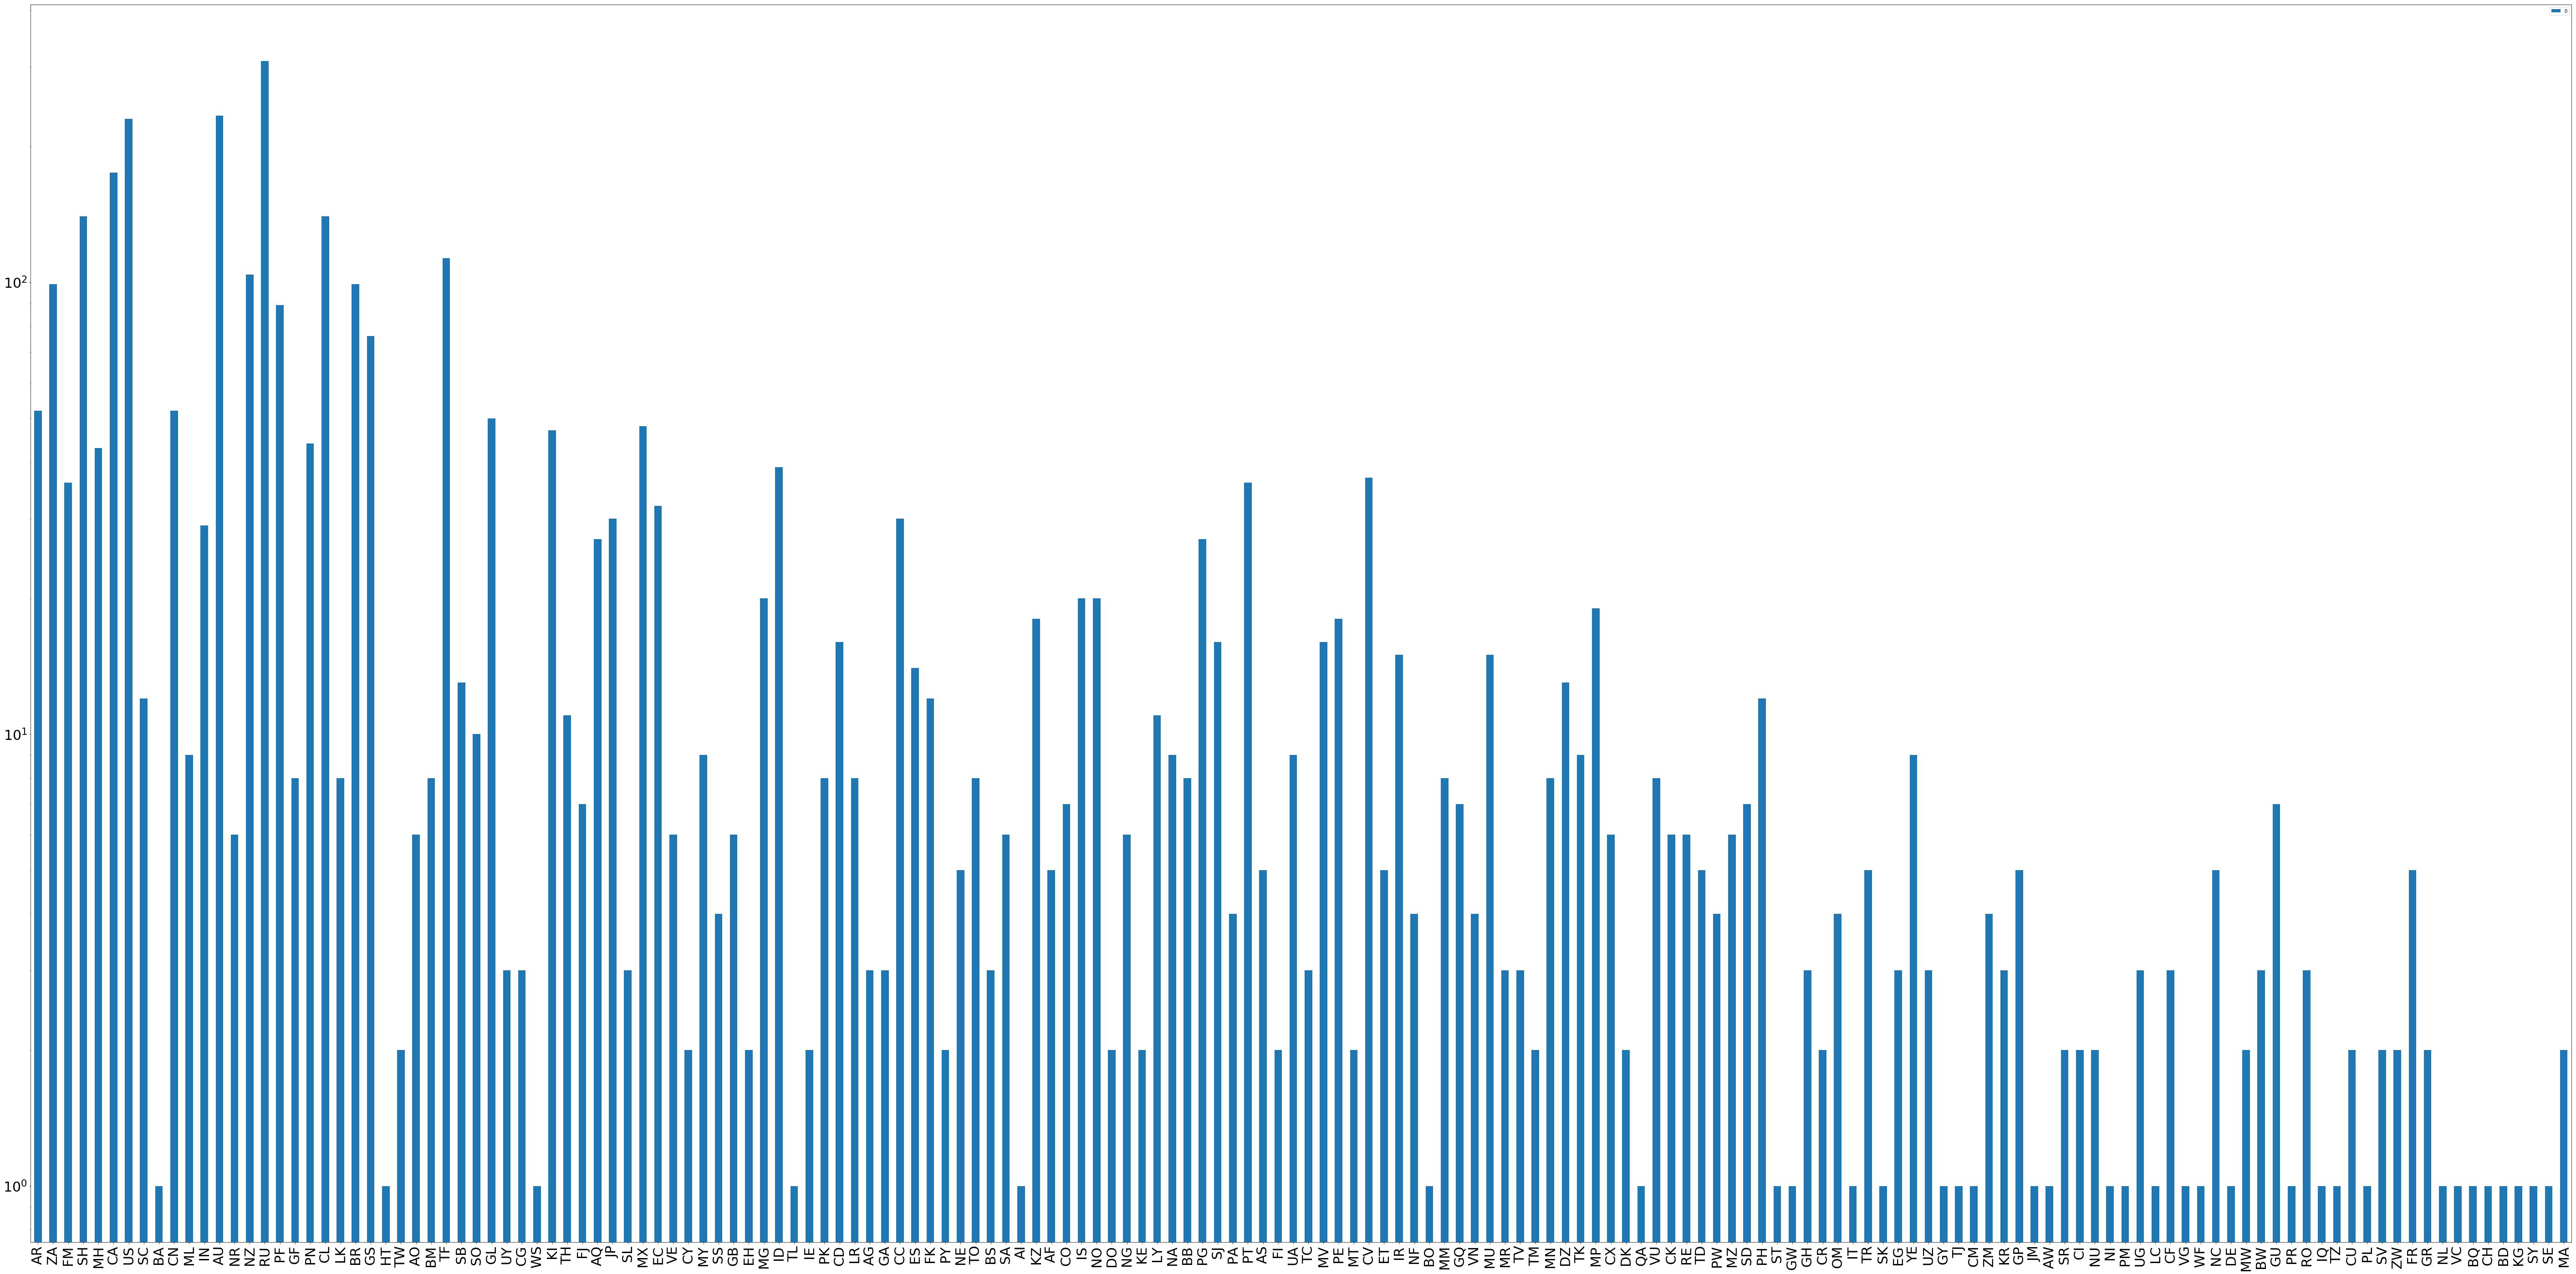

In [23]:
letter_counts = Counter(data_final['Country'])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',figsize=(100,50),logy=True,fontsize=30)